Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Load the data
df = pd.read_csv('clean_kaggle_data_2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12209 entries, 0 to 12208
Columns: 112 entries, ResponseId to ConvertedCompYearly
dtypes: float64(10), int64(6), object(96)
memory usage: 10.4+ MB


In [2]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSat,ConvertedCompYearly
0,73,I am a developer by profession,18-24,"Employed, full-time;Student, full-time;Indepen...",Hybrid,Apples,Hobby;School or academic work;Professional dev...,Secondary school,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,10.0,75.0,65.0,100.0,100.0,100.0,50.0,90.0,10,7322
1,380,I am a developer by profession,35-44,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,Master’s degree,Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,91295
2,390,I am a developer by profession,25-34,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,0.0,0.0,20.0,30.0,5.0,20.0,10.0,5.0,10,110000
3,393,I am a developer by profession,35-44,"Employed, full-time",Hybrid,Apples,Hobby;Contribute to open-source projects,Professional degree,Books / Physical media,NaN,...,0.0,10.0,30.0,5.0,10.0,0.0,0.0,5.0,7,161044
4,399,I am a developer by profession,45-54,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,30.0,10.0,30.0,0.0,0.0,0.0,5,195000


Q1

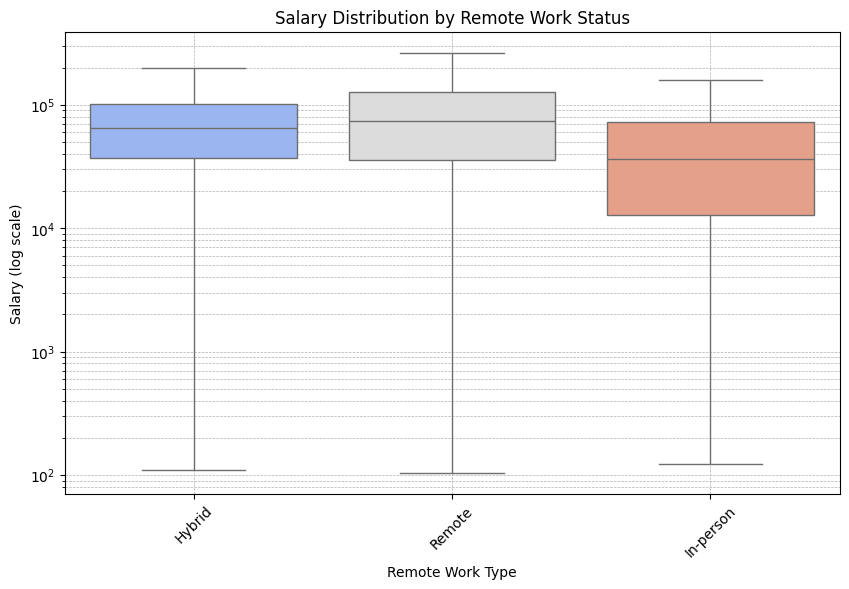

In [3]:
# Convert salary column to numeric, handling errors and missing values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Plot 1: Salary distribution by Remote Work Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="RemoteWork", y="ConvertedCompYearly", palette="coolwarm", showfliers=False)
plt.yscale("log")  # Log scale for better visualization
plt.title("Salary Distribution by Remote Work Status")
plt.xlabel("Remote Work Type")
plt.ylabel("Salary (log scale)")
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


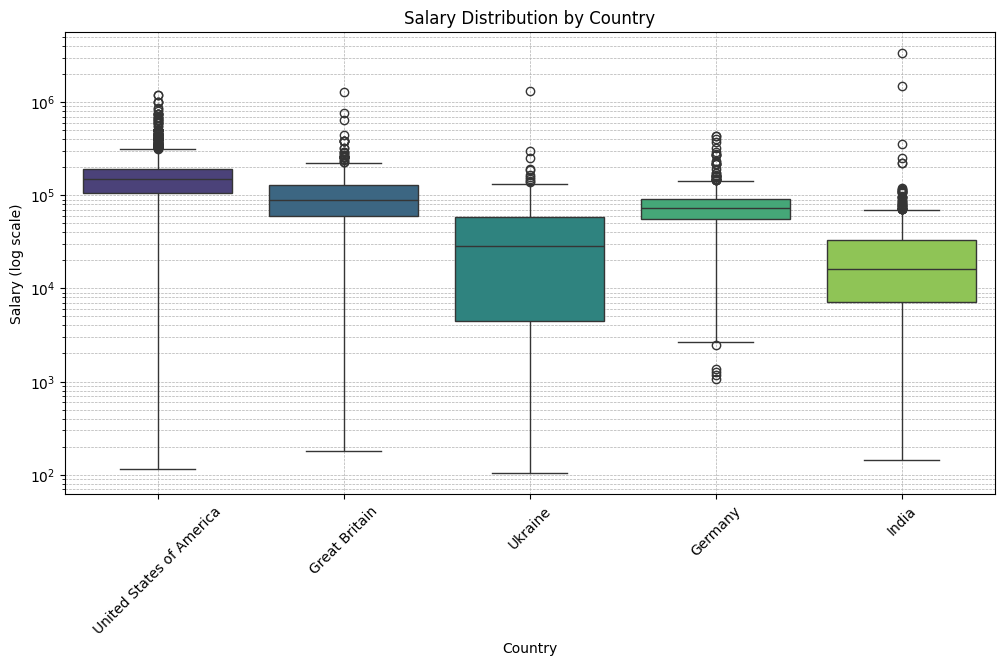

In [4]:
# Select top 5 countries by number of respondents for better visualization
top_countries = df['Country'].value_counts().nlargest(5).index
df_top_countries = df[df['Country'].isin(top_countries)]

# Plot 2: Salary distribution by country
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_countries, x="Country", y="ConvertedCompYearly", palette="viridis")
plt.yscale("log")  # Log scale for better visualization
plt.title("Salary Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Salary (log scale)")
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


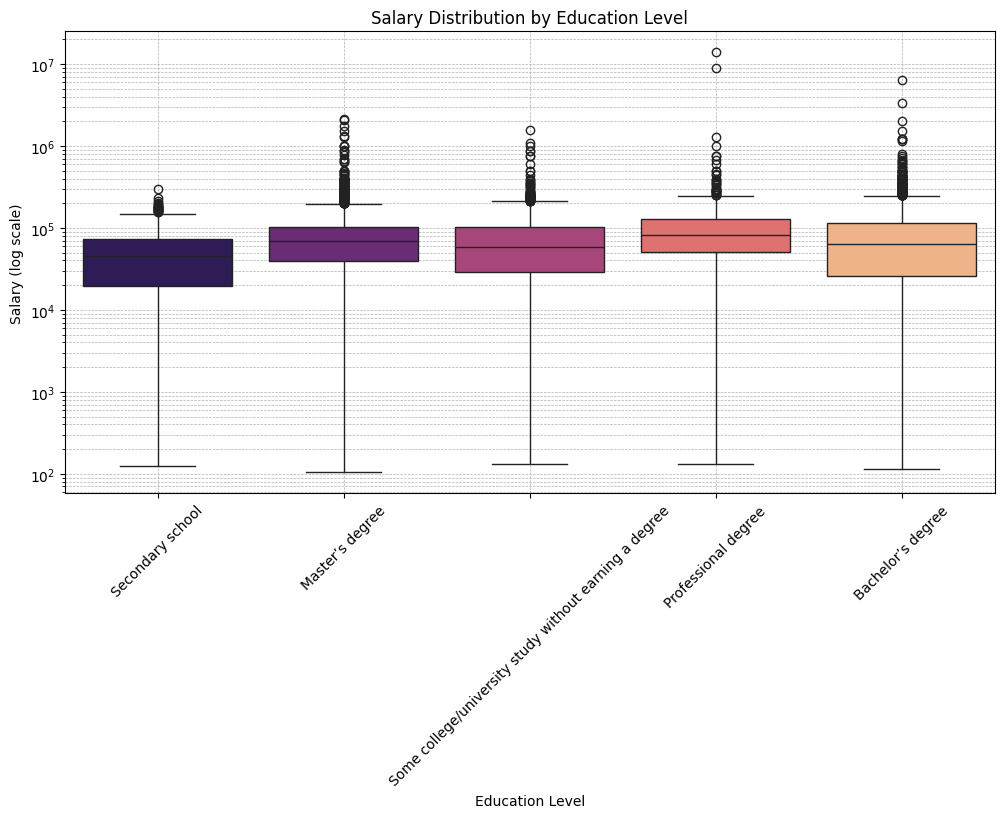

In [5]:
# Select top education levels for better visualization
top_edu_levels = df['EdLevel'].value_counts().nlargest(5).index
df_top_edu = df[df['EdLevel'].isin(top_edu_levels)]

# Plot 3: Education Level vs. Salary
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_edu, x="EdLevel", y="ConvertedCompYearly", palette="magma")
plt.yscale("log")  # Log scale for better visualization
plt.title("Salary Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Salary (log scale)")
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


Q2

a. use Intterquartile Range method to define the outliers and filter out the outliers

In [6]:
# Filter for Remote and Hybrid workers
df_filtered = df[df['RemoteWork'].isin(['Remote', 'Hybrid'])].copy()

# Define a function to detect outliers
def find_outliers(group):
    q1 = group['ConvertedCompYearly'].quantile(0.25)
    q3 = group['ConvertedCompYearly'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['ConvertedCompYearly'] < lower_bound) | (group['ConvertedCompYearly'] > upper_bound)]

# Find outliers for Remote and Hybrid groups
outliers_remote = find_outliers(df_filtered[df_filtered['RemoteWork'] == 'Remote'])
outliers_hybrid = find_outliers(df_filtered[df_filtered['RemoteWork'] == 'Hybrid'])

# Combine results
outliers = pd.concat([outliers_remote, outliers_hybrid])

In [9]:
# Display outlier records
outliers[['Country', 'RemoteWork', 'ConvertedCompYearly', 'DevType', 'YearsCodePro']].sort_values(
    by='ConvertedCompYearly', ascending=False
).head(10)

,Country,RemoteWork,ConvertedCompYearly,DevType,YearsCodePro
3858,South Africa,Hybrid,13818022,Senior Executive,10
8695,Taiwan,Hybrid,9000000,Hardware Engineer,7
5281,Brazil,Remote,6340564,"Developer, back-end",13
4176,Australia,Remote,2048046,"Developer, full-stack",12
6996,Brazil,Remote,2014062,Developer Experience,4
8531,Pakistan,Hybrid,2000000,Senior Executive,0
4280,Australia,Hybrid,1750749,"Developer, desktop or enterprise applications",30
6543,Canada,Hybrid,1562898,"Developer, game or graphics",19
4174,Canada,Hybrid,1500000,Senior Executive,25
3685,Ukraine,Remote,1332930,"Developer, back-end",3
